# Task 2 Evaluation for Prediction of Column Types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Initialize label list 

In [2]:
label_list = ['person_name', 'business_name', 'phone_number', 'address', 'street_name', 'city', 'neighborhood',
              'lat_lon_cord', 'zip_code', 'borough', 'school_name', 'color', 'car_make', 'city_agency', 'area_of_study',
              'subject_in_school', 'school_level', 'college_name', 'website', 'building_classification', 'vehicle_type',
              'location_type', 'park_playground', 'other']

Read data from real_label and predict_label and join them

In [3]:
true_label = pd.read_csv("real_label.csv")
pred_label = pd.read_csv("predict_label.csv")
result = pd.merge(true_label, pred_label, how='inner', on='column_name')

Calculate the precision and recall for all labels

In [4]:
precision = []
recall = []
for label in label_list:
    TP = len(result[result['true_label'].str.contains(label) & result['label'].str.contains(label)])
    all_pred = len(result[result['label'].str.contains(label)])
    all_actual = len(result[result['true_label'].str.contains(label)])
    precision.append(float(TP) / all_pred if all_pred != 0 else 0)
    recall.append(float(TP) / all_actual if all_actual != 0 else 0)

In [12]:
res_data = pd.DataFrame({'label': label_list, 'precision': precision, 'recall': recall})
display(res_data)

,label,precision,recall
0,person_name,1.000000,0.958333
1,business_name,0.320000,0.800000
2,phone_number,1.000000,1.000000
3,address,0.866667,0.928571
4,street_name,0.913043,0.954545
5,city,0.958333,0.958333
6,neighborhood,0.482759,1.000000
7,lat_lon_cord,0.909091,1.000000
8,zip_code,1.000000,1.000000
9,borough,1.000000,0.857143


Draw the scatter graph for all the labels with precision and recall

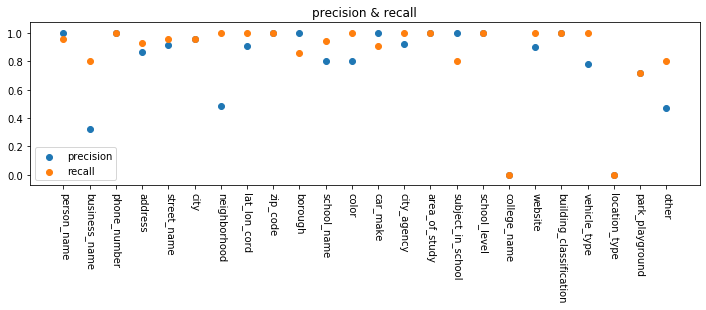

In [5]:
plt.figure(figsize=(12, 3))
plt.title('precision & recall')
plt.scatter(label_list, precision, label='precision')
plt.scatter(label_list, recall, label='recall')
# plt.scatter(label_list, precision, alpha=0.5, label='x')
# plt.hiscatterst(label_list, recall, alpha=0.5, label='y')
plt.xticks(rotation=270)
plt.legend(loc='lower left')
plt.show()